# Data Analysis Project: E-Commerce Public Dataset
- Nama: Salman Zahid Fathurrahman
- Email: salmanzf@ymail.com
- Id Dicoding:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Defining Business Question

- How is the efficient strategy to improve revenue?
- Bagaimana cara mengelola operation secara efektif untuk mengurangi cost of operation?

## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [ ]:
df_order_item = pd.read_csv('drive/MyDrive/Portfolio_Ecommerce-Dicoding/olist_order_items_dataset.csv')
df_order_payment = pd.read_csv('drive/MyDrive/Portfolio_Ecommerce-Dicoding/olist_order_payments_dataset.csv')
df_product = pd.read_csv('drive/MyDrive/Portfolio_Ecommerce-Dicoding/olist_products_dataset.csv')
df_product_cat = pd.read_csv('drive/MyDrive/Portfolio_Ecommerce-Dicoding/product_category_name_translation.csv')
df_seller = pd.read_csv('drive/MyDrive/Portfolio_Ecommerce-Dicoding/olist_sellers_dataset.csv')
df_customer = pd.read_csv('drive/MyDrive/Portfolio_Ecommerce-Dicoding/olist_customers_dataset.csv')
df_review = pd.read_csv('drive/MyDrive/Portfolio_Ecommerce-Dicoding/olist_order_reviews_dataset.csv')
df_delivery = pd.read_csv('drive/MyDrive/Portfolio_Ecommerce-Dicoding/olist_orders_dataset.csv')

### Assessing Data

#### Merging Order Item-Order Payment-Product-Product Cat

In [ ]:
#Order Price = Order Item + Order Payment
df_order_price = df_order_item.merge(df_order_payment, how='inner', on='order_id').sort_values(by='order_id')
df_order_price.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,1,credit_card,5,216.87


In [ ]:
#Product Category = Product + Product Cat
f_product_category = df_product.merge(df_product_cat, on='product_category_name', how='inner')[['product_id', 'product_category_name_english']]d
df_product_category.head(3)

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumery


In [ ]:
#Order Product = Order Price + Product Category
df_order_product = df_order_price.merge(df_product_category, on='product_id', how='inner').groupby(by=['order_id', 'product_id', 'product_category_name_english'], as_index=False).sum()
df_order_product.head(3)

<ipython-input-6-ce674834135f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_order_product = df_order_price.merge(df_product_category, on='product_id', how='inner').groupby(by=['order_id', 'product_id', 'product_category_name_english'], as_index=False).sum()


,order_id,product_id,product_category_name_english,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,1,58.9,13.29,1,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,1,239.9,19.93,1,3,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,1,199.0,17.87,1,5,216.87


#### Merging Customer-Review-Delivery

In [ ]:
#customer dataset
df_customer = df_customer[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']]
df_customer.head(3)

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP


In [ ]:
#review dataset
df_review = df_review[['review_id', 'order_id', 'review_score']]
df_review.head(3)

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5


In [ ]:
#delivery dataset
df_delivery.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [ ]:
#converting to datetima type
cols = df_delivery.columns[3:]
df_delivery[cols] = df_delivery[cols].apply(pd.to_datetime, errors='coerce')

In [ ]:
df_delivery.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [ ]:
#creating various duration column

#duration from order to arrive at customer
df_delivery['duration_arrived'] = (df_delivery['order_delivered_customer_date']-df_delivery['order_purchase_timestamp']).dt.days

#duration from carrier to arrive at customer
df_delivery['duration_carrier_customer'] = (df_delivery['order_delivered_customer_date']-df_delivery['order_delivered_carrier_date']).dt.days

#duration from purchase to arrive at carrier
df_delivery['duration_customer_carrier'] = (df_delivery['order_delivered_carrier_date']-df_delivery['order_purchase_timestamp']).dt.days

#difference of estimated time to duration_arrived
df_delivery['estimated_qos'] = (df_delivery['order_estimated_delivery_date']-df_delivery['order_delivered_customer_date']).dt.days

df_delivery.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,duration_arrived,duration_carrier_customer,duration_customer_carrier,estimated_qos
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,2.0,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,12.0,1.0,5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.0,0.0,17.0


In [ ]:
#timestamp dataset = modified delivery dataset
df_timestamp = df_delivery.iloc[:,[0,1,2,3,8,9,10,11]].sort_values('order_purchase_timestamp').reset_index(drop=True)
df_timestamp

,order_id,customer_id,order_status,order_purchase_timestamp,duration_arrived,duration_carrier_customer,duration_customer_carrier,estimated_qos
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,NaN,NaN,43.0,NaN
1,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,NaN,NaN,NaN,NaN
2,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,NaN,NaN,NaN,NaN
3,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,54.0,1.0,53.0,-37.0
4,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
99436,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaN,NaN,NaN,NaN
99437,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaN,NaN,NaN,NaN
99438,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaN,NaN,NaN,NaN
99439,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaN,NaN,NaN,NaN


### Cleaning Data

#### Timestamp Dataset

In [ ]:
#cleaning data mostly drom TimeStamp Dataset

#drop NA - for 'delivered' status only in duration
df_timestamp = df_timestamp.dropna()
df_timestamp.isna().sum()

order_id                     0
customer_id                  0
order_status                 0
order_purchase_timestamp     0
duration_arrived             0
duration_carrier_customer    0
duration_customer_carrier    0
estimated_qos                0
dtype: int64

In [ ]:
#finding anomalies in duration_arrived
q1 = np.percentile(df_timestamp['duration_arrived'], 25)
q3 = np.percentile(df_timestamp['duration_arrived'], 75)
#threshold iqr
iqr = q3-q1
iqr_anomaly = 1.5*iqr
#threshold data q1 & q3
q1_anomaly = q1-iqr_anomaly
q3_anomaly = q3+iqr_anomaly

#drop outlier (outside threshold q1 & q3)
df_timestamp = df_timestamp[(df_timestamp['duration_arrived']>q1_anomaly) | (df_timestamp['duration_arrived']<q3_anomaly)].reset_index(drop=True)
df_timestamp

#2966 data dropped

,order_id,customer_id,order_status,order_purchase_timestamp,duration_arrived,duration_carrier_customer,duration_customer_carrier,estimated_qos
0,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,54.0,1.0,53.0,-37.0
1,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,23.0,3.0,20.0,0.0
2,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,24.0,6.0,17.0,10.0
3,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,35.0,13.0,21.0,16.0
4,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,30.0,8.0,21.0,25.0
...,...,...,...,...,...,...,...,...
96470,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29 12:25:59,1.0,1.0,0.0,3.0
96471,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,1.0,1.0,0.0,4.0
96472,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,1.0,0.0,0.0,11.0
96473,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,1.0,0.0,0.0,3.0


## Exploratory Data Analysis (EDA)

### Revenue

#### By Product

In [ ]:
#melakukan penggabungan untuk produk dan transaksi
df_time_price = df_timestamp.merge(df_order_product, on='order_id', how='inner')
df_time_price

,order_id,customer_id,order_status,order_purchase_timestamp,duration_arrived,duration_carrier_customer,duration_customer_carrier,estimated_qos,product_id,product_category_name_english,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value
0,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,23.0,3.0,20.0,0.0,3ae08df6bcbfe23586dd431c40bddbb7,watches_gifts,1,29.90,15.56,1,1,45.46
1,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,24.0,6.0,17.0,10.0,fd7fd78fd3cbc1b0a6370a7909c0a629,sports_leisure,1,21.90,17.19,1,1,39.09
2,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,35.0,13.0,21.0,16.0,9c7bdf67b06b419aefb93cfdfc96c55d,sports_leisure,1,21.50,14.11,1,1,35.61
3,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,30.0,8.0,21.0,25.0,b72b39418216e944bb34e35f4d3ea8c7,sports_leisure,1,36.49,17.24,1,1,53.73
4,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,27.0,9.0,17.0,22.0,107177bf61755f05c604fe57e02467d6,furniture_decor,1,119.90,13.56,1,6,133.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98767,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29 12:25:59,1.0,1.0,0.0,3.0,777798445efd625458a90c13f3b3e6e7,toys,1,63.90,9.20,1,7,73.10
98768,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,1.0,1.0,0.0,4.0,2b4472df15512a2825ae86fd9ae79335,kitchen_dining_laundry_garden_furniture,3,418.00,92.96,2,16,1021.92
98769,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,1.0,0.0,0.0,11.0,bdcf6a834e8faa30dac3886c7a58e92e,health_beauty,1,45.90,15.39,1,1,61.29
98770,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,1.0,0.0,0.0,3.0,c7f27c5bef2338541c772b5776403e6a,party_supplies,1,24.90,8.33,1,1,33.23


In [ ]:
df_time_price = df_time_price[df_time_price['order_status'] == 'delivered']

df_time_price
#7 dropped

,order_id,customer_id,order_status,order_purchase_timestamp,duration_arrived,duration_carrier_customer,duration_customer_carrier,estimated_qos,product_id,product_category_name_english,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value
0,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,23.0,3.0,20.0,0.0,3ae08df6bcbfe23586dd431c40bddbb7,watches_gifts,1,29.90,15.56,1,1,45.46
1,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,24.0,6.0,17.0,10.0,fd7fd78fd3cbc1b0a6370a7909c0a629,sports_leisure,1,21.90,17.19,1,1,39.09
3,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,30.0,8.0,21.0,25.0,b72b39418216e944bb34e35f4d3ea8c7,sports_leisure,1,36.49,17.24,1,1,53.73
4,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,27.0,9.0,17.0,22.0,107177bf61755f05c604fe57e02467d6,furniture_decor,1,119.90,13.56,1,6,133.46
5,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03 22:31:31,10.0,6.0,4.0,39.0,e2a1d45a73dc7f5a7f9236b043431b89,fashion_shoes,1,29.99,10.96,1,4,40.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98767,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29 12:25:59,1.0,1.0,0.0,3.0,777798445efd625458a90c13f3b3e6e7,toys,1,63.90,9.20,1,7,73.10
98768,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,1.0,1.0,0.0,4.0,2b4472df15512a2825ae86fd9ae79335,kitchen_dining_laundry_garden_furniture,3,418.00,92.96,2,16,1021.92
98769,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,1.0,0.0,0.0,11.0,bdcf6a834e8faa30dac3886c7a58e92e,health_beauty,1,45.90,15.39,1,1,61.29
98770,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,1.0,0.0,0.0,3.0,c7f27c5bef2338541c772b5776403e6a,party_supplies,1,24.90,8.33,1,1,33.23


In [ ]:
#Total Revenue
df_revenue_product = df_time_price.groupby('product_category_name_english', as_index=False)['payment_value'].sum().sort_values('payment_value', ascending=False).reset_index(drop=True)
df_revenue_product

,product_category_name_english,payment_value
0,bed_bath_table,1692714.28
1,health_beauty,1620684.04
2,computers_accessories,1549252.47
3,furniture_decor,1394272.95
4,watches_gifts,1387046.31
...,...,...
66,flowers,2213.01
67,home_comfort_2,1710.54
68,cds_dvds_musicals,1199.43
69,fashion_childrens_clothes,718.98


<Axes: xlabel='payment_value', ylabel='product_category_name_english'>

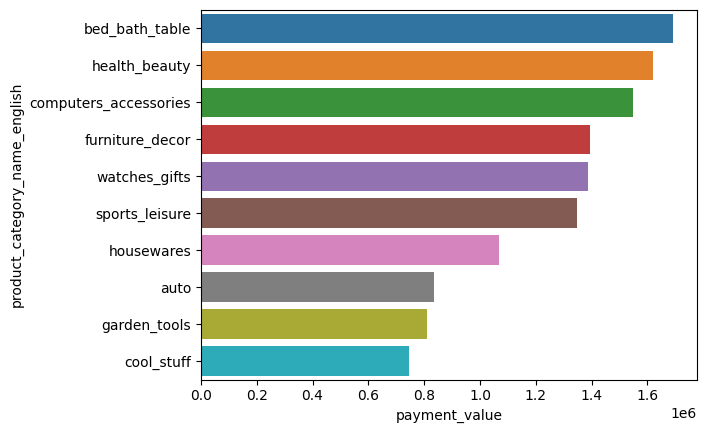

In [ ]:
sns.barplot(data=df_revenue_product.head(10), x='payment_value', y='product_category_name_english')

#### By Period

In [ ]:
#create column for periods observation
df_time_price['order_purchase_year'] = df_time_price['order_purchase_timestamp'].dt.year
df_time_price['order_purchase_month-year'] = df_time_price['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()

df_time_price.groupby(df_time_price['order_purchase_month-year'], as_index=False)['payment_value'].sum().sort_values('payment_value', ascending=False).reset_index(drop=True)

<ipython-input-20-8df94739e38a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_price['order_purchase_year'] = df_time_price['order_purchase_timestamp'].dt.year
<ipython-input-20-8df94739e38a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_price['order_purchase_month-year'] = df_time_price['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()


,order_purchase_month-year,payment_value
0,2017-11-01,1530815.84
1,2018-05-01,1473203.22
2,2018-04-01,1456300.41
3,2018-03-01,1412277.50
4,2018-01-01,1342632.07
5,2018-07-01,1298933.54
6,2018-06-01,1282453.00
7,2018-02-01,1262110.31
8,2018-08-01,1206056.96
9,2017-12-01,1001835.60


<ipython-input-21-223db31ecdcc>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_time_price, x='order_purchase_month-year', y='payment_value', estimator='sum', ci=None)


<Axes: xlabel='order_purchase_month-year', ylabel='payment_value'>

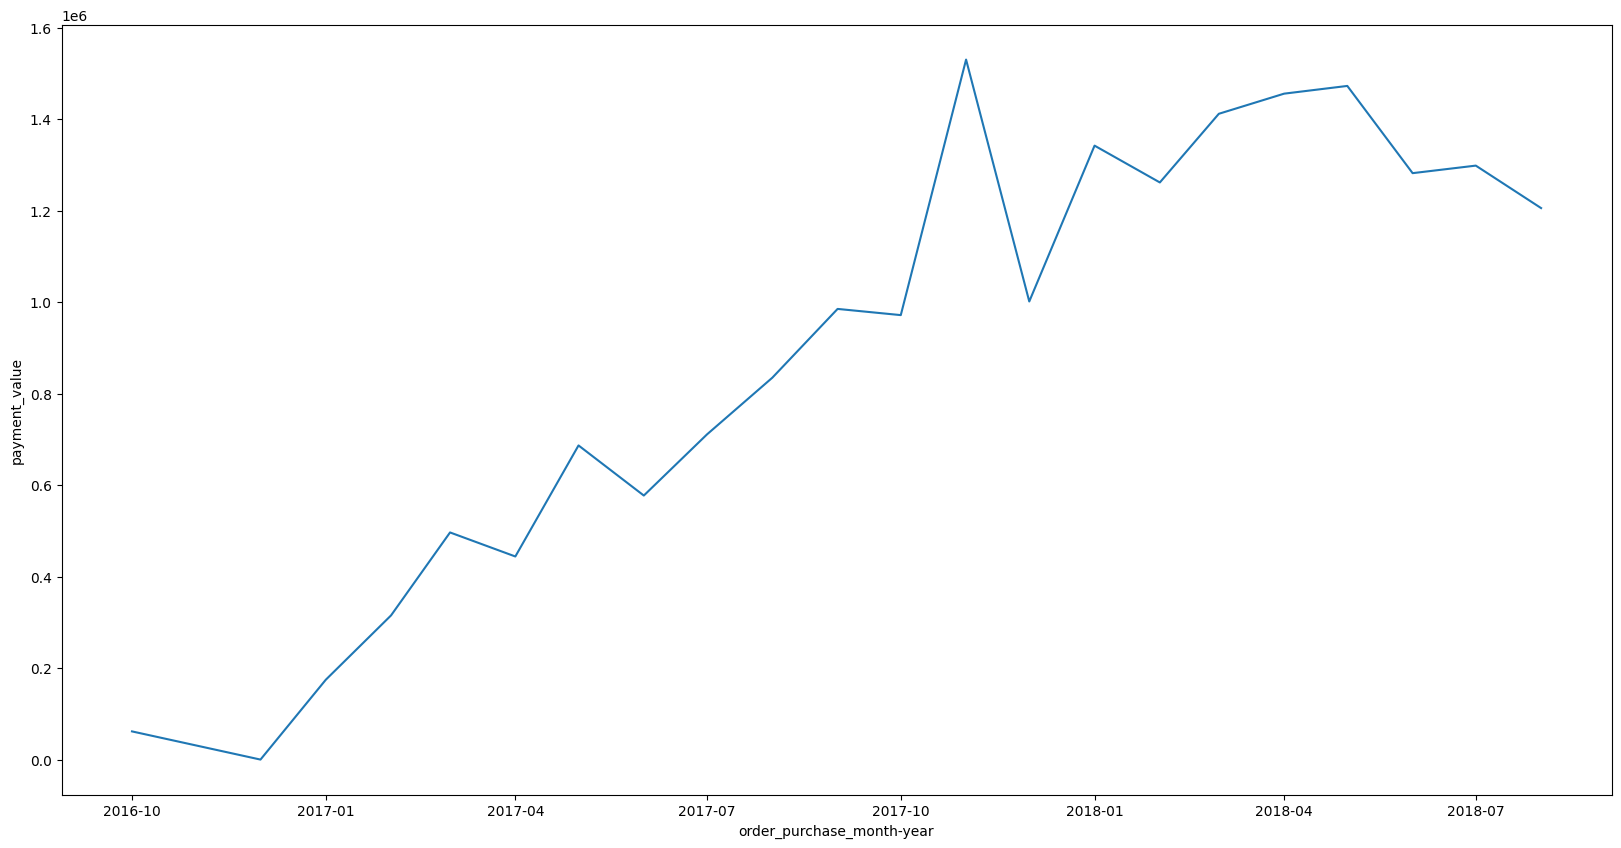

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_time_price, x='order_purchase_month-year', y='payment_value', estimator='sum', ci=None)

#2018-09 too inconsistent, drop later

#### By Area

In [ ]:
revenue_area = df_time_price.merge(df_customer, on='customer_id', how='inner')
revenue_area.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,duration_arrived,duration_carrier_customer,duration_customer_carrier,estimated_qos,product_id,product_category_name_english,...,price,freight_value,payment_sequential,payment_installments,payment_value,order_purchase_year,order_purchase_month-year,customer_unique_id,customer_city,customer_state
0,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,23.0,3.0,20.0,0.0,3ae08df6bcbfe23586dd431c40bddbb7,watches_gifts,...,29.90,15.56,1,1,45.46,2016,2016-10-01,32ea3bdedab835c3aa6cb68ce66565ef,sao paulo,SP
1,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,24.0,6.0,17.0,10.0,fd7fd78fd3cbc1b0a6370a7909c0a629,sports_leisure,...,21.90,17.19,1,1,39.09,2016,2016-10-01,2f64e403852e6893ae37485d5fcacdaf,panambi,RS
2,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,30.0,8.0,21.0,25.0,b72b39418216e944bb34e35f4d3ea8c7,sports_leisure,...,36.49,17.24,1,1,53.73,2016,2016-10-01,61db744d2f835035a5625b59350c6b63,porto alegre,RS


##### By State

In [ ]:
revenue_area_state = revenue_area.groupby('customer_state', as_index=False)['payment_value'].sum().sort_values('payment_value', ascending=False)

revenue_area_state['percentage'] = (revenue_area_state['payment_value']/revenue_area_state['payment_value'].sum())*100
revenue_area_state.head(3)

,customer_state,payment_value,percentage
25,SP,7311719.23,37.443419
18,RJ,2657572.40,13.609466
10,MG,2256771.38,11.556959


<Axes: xlabel='payment_value', ylabel='customer_state'>

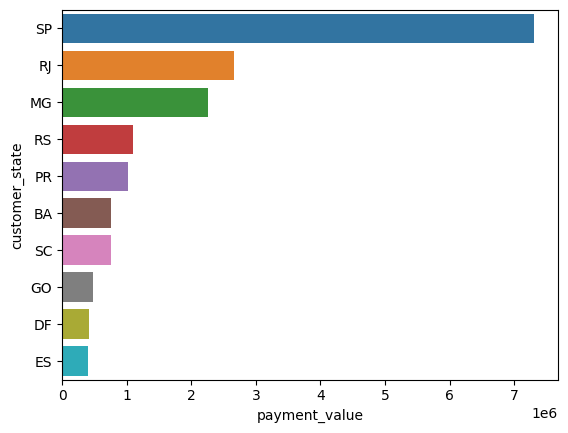

In [ ]:
sns.barplot(data=revenue_area_state.head(10), x='payment_value', y='customer_state')

##### By City

In [ ]:
revenue_area_city = revenue_area.groupby('customer_city', as_index=False)['payment_value'].sum().sort_values('payment_value', ascending=False).reset_index(drop=True)

revenue_area_city['percentage'] = round((revenue_area_city['payment_value']/revenue_area_city['payment_value'].sum())*100, 2)
revenue_area_city.head(10)

,customer_city,payment_value,percentage
0,sao paulo,2714765.92,13.90
1,rio de janeiro,1505594.46,7.71
2,belo horizonte,482562.60,2.47
3,brasilia,415948.91,2.13
4,curitiba,319988.23,1.64
5,porto alegre,291528.17,1.49
6,salvador,274564.30,1.41
7,campinas,258256.35,1.32
8,guarulhos,197448.02,1.01
9,goiania,191265.71,0.98


<Axes: xlabel='payment_value', ylabel='customer_city'>

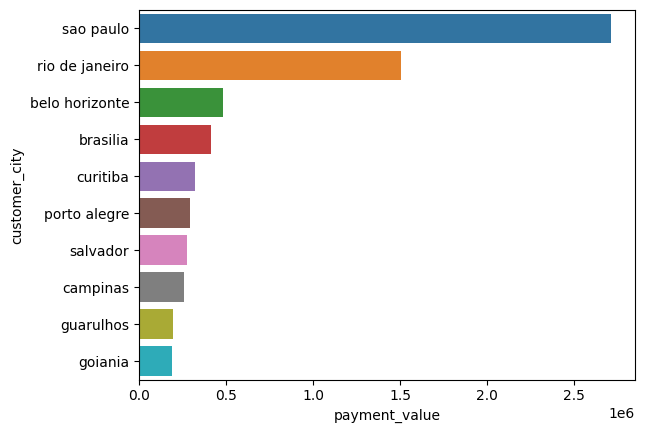

In [ ]:
sns.barplot(data=revenue_area_city.head(10), x='payment_value', y='customer_city')

### Product Popularity (By Total Order)

In [ ]:
df_product_popularity = df_timestamp.merge(df_order_product, on='order_id', how='inner')
df_product_popularity.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,duration_arrived,duration_carrier_customer,duration_customer_carrier,estimated_qos,product_id,product_category_name_english,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value
0,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,23.0,3.0,20.0,0.0,3ae08df6bcbfe23586dd431c40bddbb7,watches_gifts,1,29.90,15.56,1,1,45.46
1,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,24.0,6.0,17.0,10.0,fd7fd78fd3cbc1b0a6370a7909c0a629,sports_leisure,1,21.90,17.19,1,1,39.09
2,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,35.0,13.0,21.0,16.0,9c7bdf67b06b419aefb93cfdfc96c55d,sports_leisure,1,21.50,14.11,1,1,35.61
3,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,30.0,8.0,21.0,25.0,b72b39418216e944bb34e35f4d3ea8c7,sports_leisure,1,36.49,17.24,1,1,53.73
4,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,27.0,9.0,17.0,22.0,107177bf61755f05c604fe57e02467d6,furniture_decor,1,119.90,13.56,1,6,133.46


In [ ]:
df_product_popularity[df_product_popularity['order_id'].duplicated(keep=False)]

,order_id,customer_id,order_status,order_purchase_timestamp,duration_arrived,duration_carrier_customer,duration_customer_carrier,estimated_qos,product_id,product_category_name_english,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value
27,51725d3e4bdfc97e28b40543310da8a3,a0f95ab56c6d3a5ba0036b7fdfeda07f,delivered,2016-10-04 15:02:53,21.0,16.0,5.0,32.0,79938780eb7ffb7289f59a9a283bc06b,health_beauty,1,59.90,14.87,1,7,149.54
28,51725d3e4bdfc97e28b40543310da8a3,a0f95ab56c6d3a5ba0036b7fdfeda07f,delivered,2016-10-04 15:02:53,21.0,16.0,5.0,32.0,8f1e43e0e3374ed8c84df748034d6179,health_beauty,2,59.90,14.87,1,7,149.54
55,8b388d845a3e8700444b971fa2bef902,00474d2582fd72663036795b7ab8cfc1,delivered,2016-10-04 22:33:44,34.0,11.0,23.0,27.0,35bd74b6319ba18ae4f30d8b54144fd2,baby,1,39.90,13.40,1,1,108.84
56,8b388d845a3e8700444b971fa2bef902,00474d2582fd72663036795b7ab8cfc1,delivered,2016-10-04 22:33:44,34.0,11.0,23.0,27.0,dc82d7e8f99966cb4c641f7ea5590eaf,baby,2,39.90,15.64,1,1,108.84
62,bcbc0973414b1dd97555e6f8e9713cfa,3f6f000d5b0a959f38481fad4ab7cac2,delivered,2016-10-04 23:59:01,11.0,7.0,4.0,42.0,48a12f318432c4b6a1fdfd5d79372e66,bed_bath_table,1,79.90,15.91,1,3,383.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98642,cb4d0ce750b3542055ae832b4d3bcca4,7a24f850592485f402c7038ca51efe3b,delivered,2018-08-26 21:01:14,1.0,1.0,0.0,8.0,fcf311603fa276d415c006188e7bd070,telephony,1,18.99,7.39,1,1,52.76
98670,a63d6f123bbccd71286ef76811cb2a3b,c24bbeb8111fea27eab791a37e665210,delivered,2018-08-27 12:39:11,3.0,1.0,2.0,27.0,8cf22b2cc9465d64474a09853b62f5b2,housewares,2,65.00,6.40,1,1,180.99
98671,a63d6f123bbccd71286ef76811cb2a3b,c24bbeb8111fea27eab791a37e665210,delivered,2018-08-27 12:39:11,3.0,1.0,2.0,27.0,b6b220a6c539cb65be34eed6fea8fe63,garden_tools,4,84.00,25.60,2,2,361.98
98751,d4fae577806d683110e00e18a5e181be,49a6ae8a95c6a78d90945b983ab1ecfc,delivered,2018-08-28 19:32:05,1.0,1.0,0.0,12.0,59536eeb13a52ef81966f81b91fb481e,housewares,6,53.70,32.16,3,3,418.29


In [ ]:
df_product_popularity = df_product_popularity.groupby('product_category_name_english', as_index=False)['order_item_id'].sum().sort_values('order_item_id', ascending=False).reset_index(drop=True)
df_product_popularity.head(5)

#pretty similar results to the Revenue By Product

,product_category_name_english,order_item_id
0,bed_bath_table,14348
1,furniture_decor,11803
2,health_beauty,11189
3,sports_leisure,10043
4,computers_accessories,9960


### Freight Value & Duration

In [ ]:
#Since freight value is correlated to shipping cost, it also correlate with duration (hypothesis)
df_delivery['duration_estimation'] = (df_delivery['order_estimated_delivery_date']-df_delivery['order_purchase_timestamp']).dt.days
df_freight_estimation = df_delivery.merge(df_order_price, on='order_id', how='inner')
df_freight_estimation.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,duration_arrived,duration_carrier_customer,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,6.0,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12


<Axes: xlabel='freight_value', ylabel='duration_arrived'>

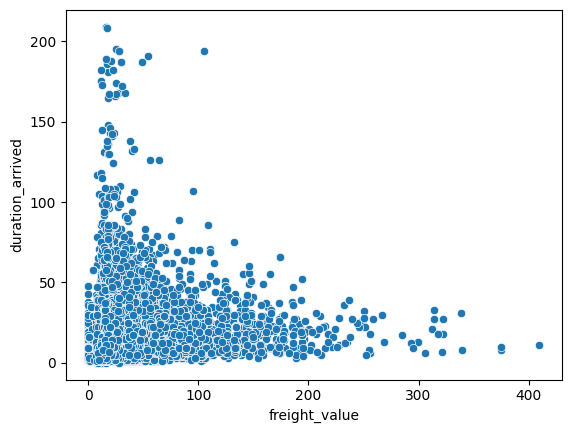

In [ ]:
sns.scatterplot(data=df_freight_estimation, x='freight_value', y='duration_arrived')

#there is no definite correlation between freight value and duration

### Review

In [ ]:
#Merge review & timestamp
review_timestamp = df_review.merge(df_timestamp, on='order_id', how='inner')
review_timestamp.head(5)

,review_id,order_id,review_score,customer_id,order_status,order_purchase_timestamp,duration_arrived,duration_carrier_customer,duration_customer_carrier,estimated_qos
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,6.0,4.0,1.0,15.0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,9.0,7.0,2.0,4.0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,13.0,10.0,3.0,20.0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,10.0,9.0,0.0,19.0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,18.0,12.0,5.0,8.0


In [ ]:
review_timestamp.isna().sum()

review_id                    0
order_id                     0
review_score                 0
customer_id                  0
order_status                 0
order_purchase_timestamp     0
duration_arrived             0
duration_carrier_customer    0
duration_customer_carrier    0
estimated_qos                0
dtype: int64

#### Review vs Duration Arrived

In [ ]:
#mean review vs duration
review_vs_arrive = review_timestamp.groupby('review_score', as_index=False)['duration_arrived'].mean()
review_vs_arrive

,review_score,duration_arrived
0,1,20.849825
1,2,16.194832
2,3,13.795278
3,4,11.848054
4,5,10.223365


In [ ]:
#mean duration vs review
arrive_vs_review = review_timestamp.groupby('duration_arrived', as_index=False)['review_score'].mean()
arrive_vs_review.head(3)

,duration_arrived,review_score
0,0.0,4.230769
1,1.0,4.495547
2,2.0,4.478330


In [ ]:
#count arrive
arrive_review_count = review_timestamp.groupby('duration_arrived', as_index=False)['review_score'].count()
arrive_review_count.head(3)

,duration_arrived,review_score
0,0.0,13
1,1.0,1572
2,2.0,3161


<Axes: xlabel='duration_arrived', ylabel='review_score'>

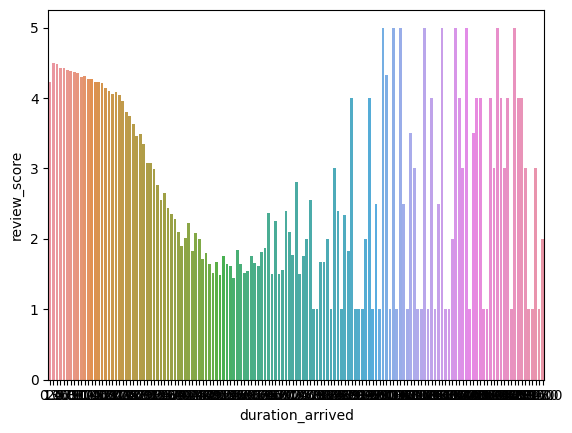

In [ ]:
sns.barplot(arrive_vs_review, x='duration_arrived', y='review_score')

<Axes: xlabel='duration_arrived', ylabel='review_score'>

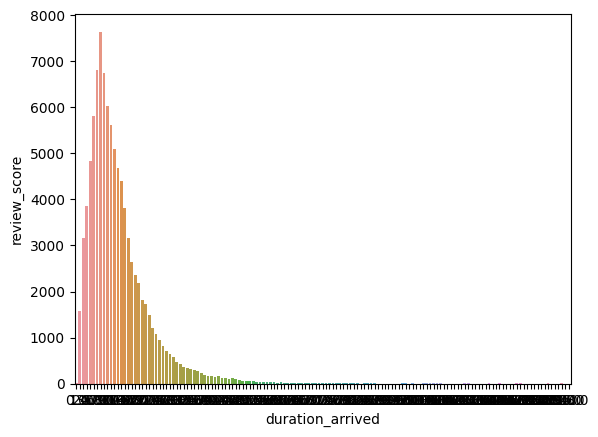

In [ ]:
sns.barplot(arrive_review_count, x='duration_arrived', y='review_score')

#too many anomalies in higher duration arrived, where the higher duration has too few sample

<Axes: xlabel='review_score', ylabel='duration_arrived'>

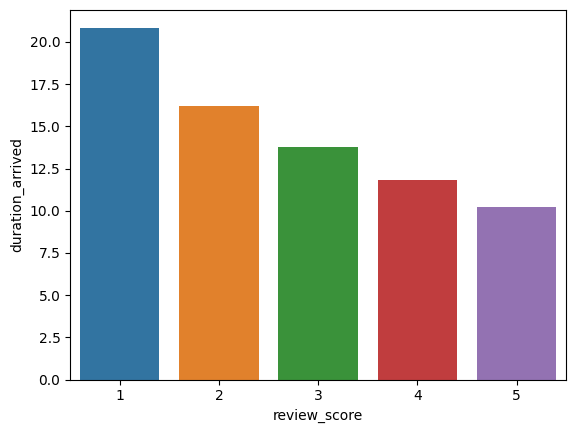

In [ ]:
sns.barplot(review_vs_arrive, x='review_score', y='duration_arrived')

#Higher duration has negative impact on review (in general)

In [ ]:
np.corrcoef(review_timestamp['duration_arrived'], review_timestamp['review_score'])

#Review Score has negative relationship with duration arrived

array([[ 1.        , -0.33372072],
       [-0.33372072,  1.        ]])

### Estimated Duration Accuracy

In [ ]:
df_timestamp[df_timestamp['estimated_qos']<0]

,order_id,customer_id,order_status,order_purchase_timestamp,duration_arrived,duration_carrier_customer,duration_customer_carrier,estimated_qos
0,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,54.0,1.0,53.0,-37.0
43,b0cfee6ce5503781be6004e0e31e4309,9e18a290b9d17b14fe33b68a0ea2bfeb,delivered,2016-10-04 18:07:24,55.0,8.0,47.0,-2.0
53,5cc475c7c03290048eb2e742cd64cb5e,75e8f990b9e289013b1d092614b52487,delivered,2016-10-04 21:54:52,68.0,6.0,62.0,-19.0
258,c776863a93dc0740c6e7d78104b21413,1710b798ebdc5db6665c815b90a64999,delivered,2016-10-10 15:01:27,64.0,30.0,34.0,-1.0
308,89898719573722b59b173f76fb213501,d2b141e8cefd8acb97baee4b25b01ea5,delivered,2017-01-07 00:34:47,58.0,54.0,3.0,-20.0
...,...,...,...,...,...,...,...,...
96405,56610fa87188c93ee5993a5e98a7b092,2bc660beaeab7f3089e8ce729b054c74,delivered,2018-08-27 19:26:54,3.0,2.0,0.0,-1.0
96406,bd2c2c3a4d59e68fb14a526745572883,1ab3117f58e7d55791a60513d9dd7f4f,delivered,2018-08-27 19:29:28,3.0,2.0,0.0,-1.0
96407,734fd23f82c457088580cf5a8c9da909,586917ded6789bf18fbd8db6e5683e6c,delivered,2018-08-27 19:32:27,2.0,1.0,1.0,-1.0
96420,c469458d116f862637d6c26ae62ff8f2,dd280839d45cc0f98c6b2de9665909a0,delivered,2018-08-27 22:54:07,2.0,2.0,0.0,-1.0


In [ ]:
(len(df_timestamp[df_timestamp['estimated_qos']<0])/len(df_timestamp))*100

#Error in the estimated duration is about 8.12%

8.111946100025913

### Traffic

#### Peak Hour

In [ ]:
df_peak_hour = df_timestamp.iloc[:, [0,3]]

In [ ]:
df_peak_hour['hour'] = df_peak_hour['order_purchase_timestamp'].dt.hour
df_peak_hour

<ipython-input-44-d015374432fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_hour['hour'] = df_peak_hour['order_purchase_timestamp'].dt.hour


,order_id,order_purchase_timestamp,hour
0,bfbd0f9bdef84302105ad712db648a6c,2016-09-15 12:16:38,12
1,3b697a20d9e427646d92567910af6d57,2016-10-03 09:44:50,9
2,be5bc2f0da14d8071e2d45451ad119d9,2016-10-03 16:56:50,16
3,65d1e226dfaeb8cdc42f665422522d14,2016-10-03 21:01:41,21
4,a41c8759fbe7aab36ea07e038b2d4465,2016-10-03 21:13:36,21
...,...,...,...
96470,52018484704db3661b98ce838612b507,2018-08-29 12:25:59,12
96471,0b223d92c27432930dfe407c6aea3041,2018-08-29 14:18:23,14
96472,168626408cb32af0ffaf76711caae1dc,2018-08-29 14:18:28,14
96473,03ef5dedbe7492bdae72eec50764c43f,2018-08-29 14:52:00,14


In [ ]:
df_peak_hour = df_peak_hour.groupby('hour',as_index=False)['order_id'].count()
df_peak_hour.head(3)

,hour,order_id
0,0,2322
1,1,1133
2,2,496


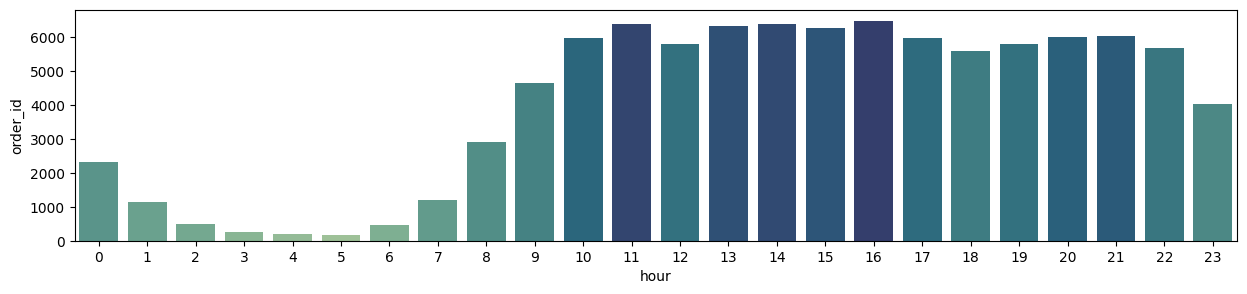

In [ ]:
plt.figure(figsize=(15,3))
ax = sns.barplot(df_peak_hour,
                 x='hour',
                 y='order_id',
                 palette='crest',
                 hue='order_id',
                 dodge=False)
ax.legend_.remove()

#### Peak Day of Week

In [ ]:
df_time_price.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,duration_arrived,duration_carrier_customer,duration_customer_carrier,estimated_qos,product_id,product_category_name_english,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,order_purchase_year,order_purchase_month-year
0,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,23.0,3.0,20.0,0.0,3ae08df6bcbfe23586dd431c40bddbb7,watches_gifts,1,29.90,15.56,1,1,45.46,2016,2016-10-01
1,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,24.0,6.0,17.0,10.0,fd7fd78fd3cbc1b0a6370a7909c0a629,sports_leisure,1,21.90,17.19,1,1,39.09,2016,2016-10-01
3,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,30.0,8.0,21.0,25.0,b72b39418216e944bb34e35f4d3ea8c7,sports_leisure,1,36.49,17.24,1,1,53.73,2016,2016-10-01
4,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,27.0,9.0,17.0,22.0,107177bf61755f05c604fe57e02467d6,furniture_decor,1,119.90,13.56,1,6,133.46,2016,2016-10-01
5,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03 22:31:31,10.0,6.0,4.0,39.0,e2a1d45a73dc7f5a7f9236b043431b89,fashion_shoes,1,29.99,10.96,1,4,40.95,2016,2016-10-01


In [ ]:
df_time_price['day_of_week'] = df_time_price['order_purchase_timestamp'].dt.dayofweek
df_time_price['day_name'] = df_time_price['order_purchase_timestamp'].dt.day_name()

<ipython-input-48-bd9cc1f7e0cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_price['day_of_week'] = df_time_price['order_purchase_timestamp'].dt.dayofweek
<ipython-input-48-bd9cc1f7e0cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_price['day_name'] = df_time_price['order_purchase_timestamp'].dt.day_name()


In [ ]:
df_traffic_dayofweek = df_time_price.groupby(['day_of_week', 'day_name'], as_index=False)['order_id'].nunique()
df_traffic_dayofweek

,day_of_week,day_name,order_id
0,0,Monday,15491
1,1,Tuesday,15286
2,2,Wednesday,14856
3,3,Thursday,14123
4,4,Friday,13498
5,5,Saturday,10401
6,6,Sunday,11462


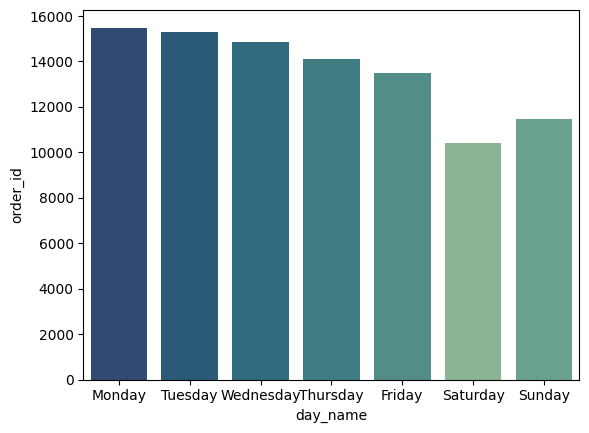

In [ ]:
ax = sns.barplot(data=df_traffic_dayofweek,
            x='day_name',
            y='order_id',
            palette='crest',
            hue='order_id',
            dodge=False)
ax.legend_.remove()

#### Peak Date of Month

In [ ]:
df_time_price['date'] = df_time_price['order_purchase_timestamp'].dt.day
df_time_price.head(5)

<ipython-input-51-cf11472096e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_price['date'] = df_time_price['order_purchase_timestamp'].dt.day


,order_id,customer_id,order_status,order_purchase_timestamp,duration_arrived,duration_carrier_customer,duration_customer_carrier,estimated_qos,product_id,product_category_name_english,...,price,freight_value,payment_sequential,payment_installments,payment_value,order_purchase_year,order_purchase_month-year,day_of_week,day_name,date
0,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,23.0,3.0,20.0,0.0,3ae08df6bcbfe23586dd431c40bddbb7,watches_gifts,...,29.90,15.56,1,1,45.46,2016,2016-10-01,0,Monday,3
1,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,24.0,6.0,17.0,10.0,fd7fd78fd3cbc1b0a6370a7909c0a629,sports_leisure,...,21.90,17.19,1,1,39.09,2016,2016-10-01,0,Monday,3
3,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,30.0,8.0,21.0,25.0,b72b39418216e944bb34e35f4d3ea8c7,sports_leisure,...,36.49,17.24,1,1,53.73,2016,2016-10-01,0,Monday,3
4,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,27.0,9.0,17.0,22.0,107177bf61755f05c604fe57e02467d6,furniture_decor,...,119.90,13.56,1,6,133.46,2016,2016-10-01,0,Monday,3
5,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03 22:31:31,10.0,6.0,4.0,39.0,e2a1d45a73dc7f5a7f9236b043431b89,fashion_shoes,...,29.99,10.96,1,4,40.95,2016,2016-10-01,0,Monday,3


In [ ]:
df_traffic_date = df_time_price.groupby(['date'], as_index=False)['order_id'].nunique()
df_traffic_date.head(3)

,date,order_id
0,1,2977
1,2,3064
2,3,3147


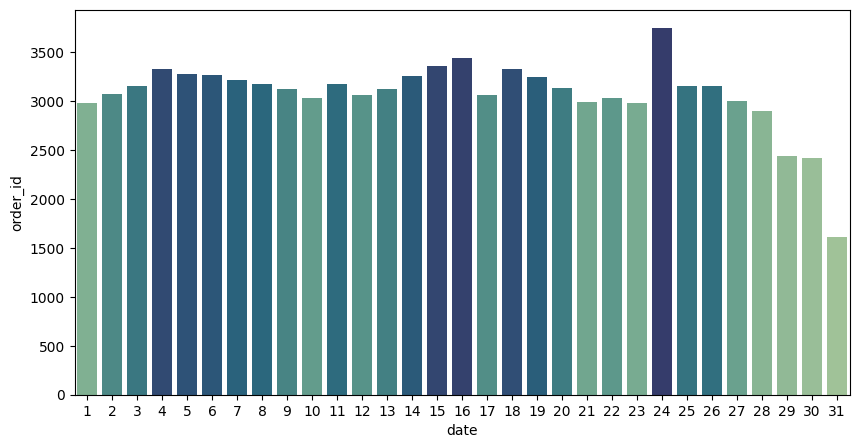

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_traffic_date,
            x='date',
            y='order_id',
            palette='crest',
            hue='order_id',
            dodge=False)
ax.legend_.remove()

#no particular trend

### Customer

In [ ]:
#unique customer count location
df_customer_distinct = df_customer.drop_duplicates(subset=['customer_unique_id'])
df_customer_distinct.head(3)

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP


In [ ]:
#unique customer number of order location
df_order_location = df_delivery.merge(df_customer, on='customer_id', how='inner').iloc[:,[0,-2,-1]]
df_order_location.head(3)

,order_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,vianopolis,GO


#### State

##### By Unique Customer

In [ ]:
unique_customer_state = df_customer_distinct.groupby('customer_state', as_index=False)['customer_unique_id'].count().sort_values('customer_unique_id', ascending=False).reset_index(drop=True)
unique_customer_state.head(5)

#similar to revenue

,customer_state,customer_unique_id
0,SP,40295
1,RJ,12377
2,MG,11255
3,RS,5277
4,PR,4882


##### By number of order

In [ ]:
unique_order_state = df_order_location.groupby('customer_state', as_index=False)['order_id'].nunique().sort_values('order_id', ascending=False)
unique_order_state.head(5)

#similar to revenue & unique customer

,customer_state,order_id
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


### Payment

In [ ]:
payment_order = df_timestamp[df_timestamp['order_status']=='delivered'].merge(df_order_payment, on='order_id', how='inner')
payment_order

,order_id,customer_id,order_status,order_purchase_timestamp,duration_arrived,duration_carrier_customer,duration_customer_carrier,estimated_qos,payment_sequential,payment_type,payment_installments,payment_value
0,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,23.0,3.0,20.0,0.0,1,boleto,1,45.46
1,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,24.0,6.0,17.0,10.0,1,boleto,1,39.09
2,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,30.0,8.0,21.0,25.0,1,boleto,1,53.73
3,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,27.0,9.0,17.0,22.0,1,credit_card,6,133.46
4,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03 22:31:31,10.0,6.0,4.0,39.0,1,credit_card,4,40.95
...,...,...,...,...,...,...,...,...,...,...,...,...
100742,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29 12:25:59,1.0,1.0,0.0,3.0,1,credit_card,7,73.10
100743,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,1.0,1.0,0.0,4.0,1,credit_card,8,510.96
100744,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,1.0,0.0,0.0,11.0,1,voucher,1,61.29
100745,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,1.0,0.0,0.0,3.0,1,credit_card,1,33.23


#### Revenue

In [ ]:
payment_revenue = payment_order.groupby('payment_type', as_index=False)['payment_value'].sum().sort_values(by='payment_value', ascending=False).reset_index(drop=True)
payment_revenue

,payment_type,payment_value
0,credit_card,12099876.22
1,boleto,2769932.58
2,voucher,343013.19
3,debit_card,208066.88


#### Total Order

In [ ]:
payment_count = payment_order.groupby('payment_type', as_index=False)['order_id'].count().sort_values(by='order_id', ascending=False).reset_index(drop=True)
payment_count

,payment_type,order_id
0,credit_card,74578
1,boleto,19191
2,voucher,5493
3,debit_card,1485


#### Pay Weight

In [ ]:
payment_weight = payment_revenue['payment_value']/payment_count['order_id']
payment_weight

0    162.244579
1    144.334979
2     62.445511
3    140.112377
dtype: float64

## Visualization & Explanatory Analysis

### Question 1: How is the efficient strategy to improve revenue?

#### Revenue growth

<ipython-input-62-287a72de234a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_time_price, x='order_purchase_month-year', y='payment_value', estimator='sum', ci=None)


<Axes: xlabel='order_purchase_month-year', ylabel='payment_value'>

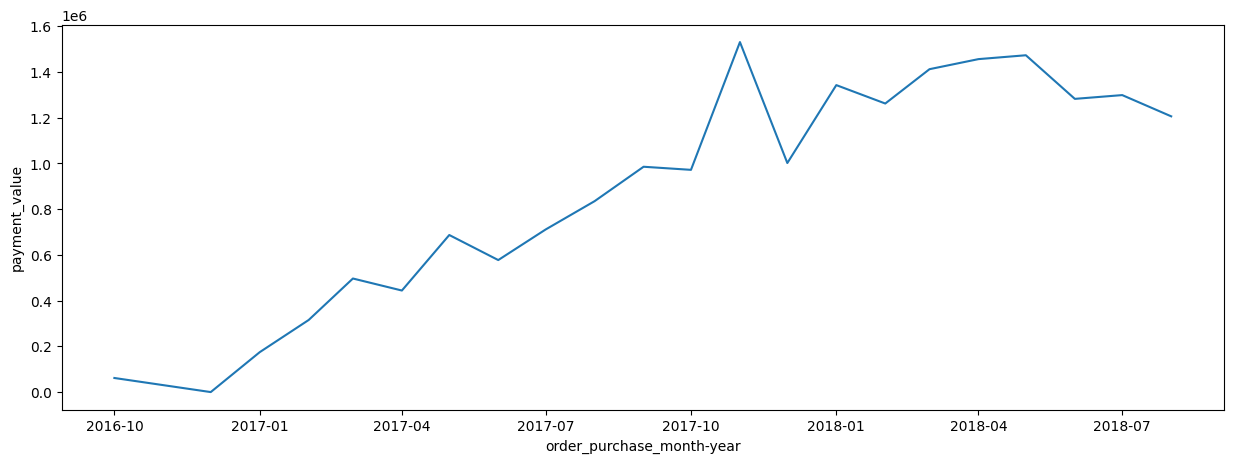

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_time_price, x='order_purchase_month-year', y='payment_value', estimator='sum', ci=None)

While the revenue growth is outstanding from 2016 to 2018, we can see the decline in late 2018.

Our approach will try to solve this problem by analyzing revenue in each of these category to see its significance:
- Product category
- Area (state, city)

While we explore, we might find further pieces to enchance our analysis.

#### Revenue in each product category

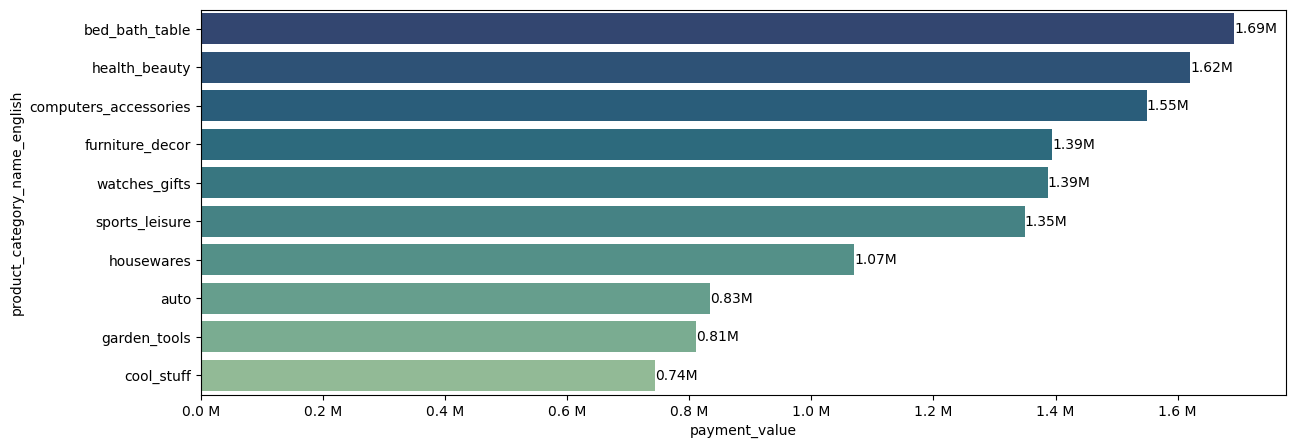

In [ ]:
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

palette_bar = sns.color_palette('crest', n_colors=10)
palette_bar.reverse()
labels = round(df_revenue_product['payment_value']/1E6, 2).head(10).astype('str') + 'M'

fig, ax = plt.subplots(figsize=(14,5))
sns.barplot(data=df_revenue_product.head(10), x='payment_value', y='product_category_name_english', palette=palette_bar)

ax.bar_label(ax.containers[0], labels=labels)
ax.xaxis.set_major_formatter(million_formatter)

- With the top 10 most generated revenue product, the profile of the buyer is pretty variative
- Even within the top 3 product, we can see different user segmentation based on its interest (household, beauty product, electronics)
- While the user is pretty variative, we can see mostly the interest in household furnitures (bed bath table, furniture decor, housewares)

#### Revenue in Each State & City

In [ ]:
top_5 = revenue_area_state[:5]
new_row = pd.DataFrame(data={
    'customer_state':['Others'],
    'payment_value':[revenue_area_state['payment_value'][5:].sum()],
    'percentage':[revenue_area_state['percentage'][5:].sum()]
})
pie_revenue_state = pd.concat([top_5, new_row]).reset_index(drop=True)
pie_revenue_state

,customer_state,payment_value,percentage
0,SP,7311719.23,37.443419
1,RJ,2657572.40,13.609466
2,MG,2256771.38,11.556959
3,RS,1091430.07,5.589229
4,PR,1020152.26,5.224214
5,Others,5189735.90,26.576712


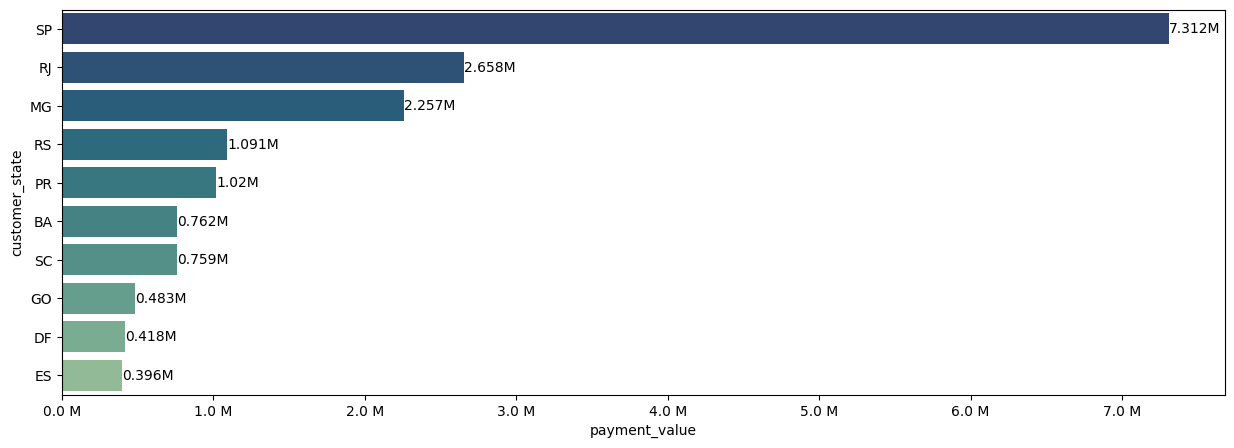

In [ ]:
#By State
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)
palette_bar = sns.color_palette('crest', n_colors=10)
palette_bar.reverse()
labels = round(revenue_area_state['payment_value']/1E6, 3).head(10).astype('str') + 'M'

fig, ax = plt.subplots(figsize=(15,5))

sns.barplot(data=revenue_area_state.head(10), x='payment_value', y='customer_state', palette=palette_bar)
for bars in ax.containers:
        ax.bar_label(bars, labels=labels)
ax.xaxis.set_major_formatter(million_formatter)

Text(0.5, 1.0, 'Revenue Contribution per State (%)')

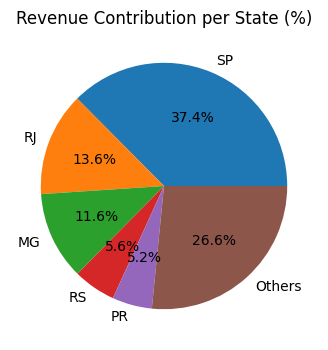

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ax.pie(pie_revenue_state['payment_value'], labels=pie_revenue_state['customer_state'], autopct='%1.1f%%')
plt.title('Revenue Contribution per State (%)')

Right away we can tell there is a massive different in generated revenue between 'SP' and the others.
- SP alone has more revenue than 5 combined latter states.
- We can group the states based on its generated revenue characteristics: SP -> RJ, MG -> RS, PR -> BA, SC -> GO, DF, ES

In [ ]:
#By City
revenue_area_city = revenue_area.groupby(['customer_city','customer_state'], as_index=False)['payment_value'].sum().sort_values('payment_value', ascending=False).reset_index(drop=True)

<ipython-input-68-66488e0c447d>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=revenue_area_city.head(10),


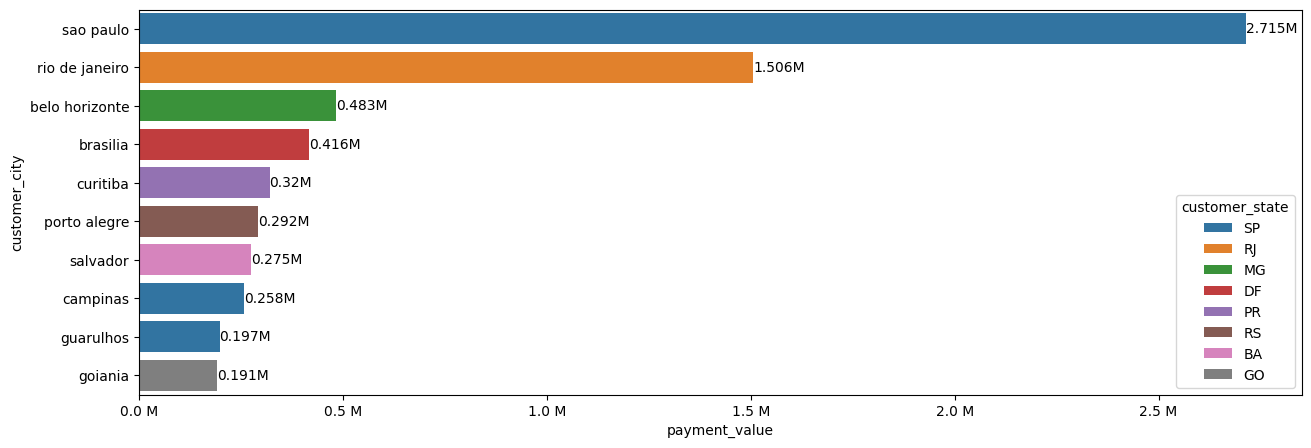

In [ ]:
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)
palette_bar = sns.color_palette('crest', n_colors=10)
palette_bar.reverse()
labels = round(revenue_area_city['payment_value']/1E6, 3).head(10).astype('str') + 'M'

fig, ax = plt.subplots(figsize=(15,5))

sns.barplot(data=revenue_area_city.head(10),
            x='payment_value',
            y='customer_city',
            hue='customer_state',
            ci=None,
            dodge=False)
for bars in ax.containers:
        ax.bar_label(bars, labels=labels)
ax.xaxis.set_major_formatter(million_formatter)

This results is honestly surprising. Turns out only one city (sao paulo, rio de janeiro, etc..) dominated the generated revenues in each highest revenue state (SP, RJ, MG, etc..) while the rest characteristic of user in each city is similar to other states.

According to these results, we can improve the revenues based on the scopes:
- For sao paulo and rio de janeiro, we can maintain the revenues by providing offer for long term user in the popular product category and also providing survey about future interests;
- For the remaining city with low generated revenues, especially in the SP and RJ state nearby highest revenue, we can plan advertisement strategy via online or offline to reach new potential customer

#### Extra Action - Maintain the Revenue through Offer and Survey Based on Payment Type

<ipython-input-69-8566375d04ae>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=payment_revenue,


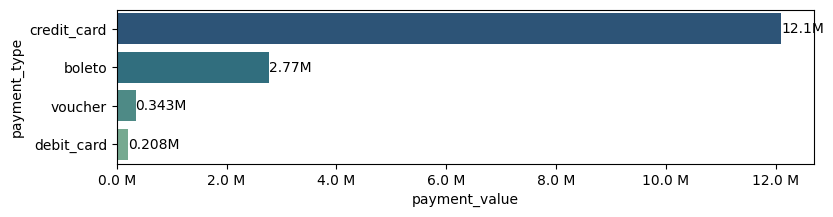

In [ ]:
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)
palette_bar = sns.color_palette('crest', n_colors=4)
palette_bar.reverse()
labels = round(payment_revenue['payment_value']/1E6, 3).head(10).astype('str') + 'M'

fig, ax = plt.subplots(figsize=(9,2))

sns.barplot(data=payment_revenue,
            x='payment_value',
            y='payment_type',
            palette=palette_bar,
            ci=None
            )
for bars in ax.containers:
        ax.bar_label(bars, labels=labels)
ax.xaxis.set_major_formatter(million_formatter)

With this we know our focust on maintaining revenue besides location & product category, we can focus at providing offers and survey to the user using payment with credit card and maybe some boleto to test the water.

### Question 2: What action can be done to reduce cost of operation efficiently?

#### Traffic

What we mean by cost of operation here is mainly related to transaction traffic. The number of transaction traffic caused will decide the number of resources needed to supply the server. By knowing  the activity in transaction traffic, we can manage the resources in the server side efficiently.

##### Traffic by Hour

In [ ]:
df_time_price['hour'] = df_time_price['order_purchase_timestamp'].dt.hour
df_traffic_hour = df_time_price.groupby('hour', as_index=False)['order_id'].nunique()
df_traffic_hour['percentage'] = (df_traffic_hour['order_id']/df_traffic_hour['order_id'].sum())*100

<ipython-input-70-c0c6e2ad1d52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_price['hour'] = df_time_price['order_purchase_timestamp'].dt.hour


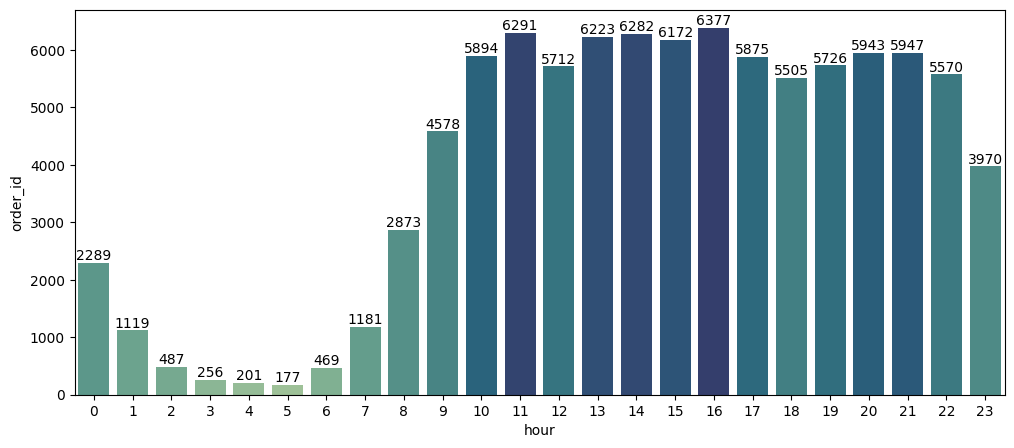

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df_traffic_hour,
                 x='hour',
                 y='order_id',
                 palette='crest',
                 hue='order_id',
                 dodge=False)
for i in ax.containers:
    ax.bar_label(i,)
ax.legend_.remove()

- By these graphic, we know the peak traffic is from 10.00 - 22.00 so the resources allocated in these hours need to be high;
- After 22.00, we can gradually reduce the resources until 05.00;
- After 05.00, we can gradually increase the resources until 10.00 where the resources is ready at the highest capacity

##### Traffic By Day of Week

In [ ]:
df_time_price['day_of_week'] = df_time_price['order_purchase_timestamp'].dt.dayofweek
df_time_price['day_name'] = df_time_price['order_purchase_timestamp'].dt.day_name()
df_traffic_dayofweek = df_time_price.groupby(['day_of_week', 'day_name'], as_index=False)['order_id'].nunique()

<ipython-input-72-771a430b8062>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_price['day_of_week'] = df_time_price['order_purchase_timestamp'].dt.dayofweek
<ipython-input-72-771a430b8062>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_price['day_name'] = df_time_price['order_purchase_timestamp'].dt.day_name()


In [ ]:
df_traffic_dayofweek

,day_of_week,day_name,order_id
0,0,Monday,15491
1,1,Tuesday,15286
2,2,Wednesday,14856
3,3,Thursday,14123
4,4,Friday,13498
5,5,Saturday,10401
6,6,Sunday,11462


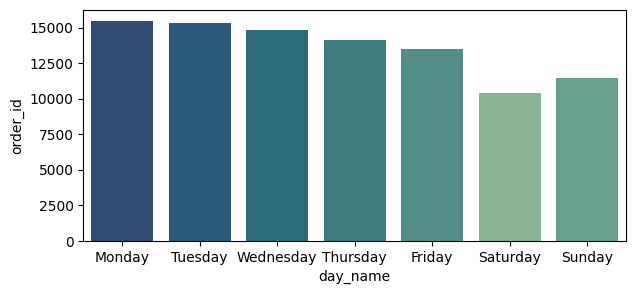

In [ ]:
plt.figure(figsize=(7,3))
ax = sns.barplot(data=df_traffic_dayofweek,
            x='day_name',
            y='order_id',
            palette='crest',
            hue='order_id',
            dodge=False)
ax.legend_.remove()

From these results, we can cycle the server load priority from weekdays (high) to weekend (lower)

## Conclusion

1. Question 1 - How is the efficient strategy to improve revenue?

There are 2 strategies, increase the interests of active user and expand the userbase
- Active users are correlated to the area which generated the highest revenue since the user has similar economic activity
    - Focus in the states which generated the highest revenue especially SP which contributed 36% of total revenue
    - Look at the highest generated revenue city in each state
    - Survey about future interests and offer promo related to the highest generated revenue product category targeting user with the credit card payment type
- Since only 1 city dominated each generated revenue in each state, the next priority is to expand the business
    - Focus in the area nearby the city with highest generated revenue
    - Do some online and offline advertisement in city close to Sao Paulo since it should have similar economic activity
    - If the advertisement is successful, do another in city close to Rio de Janeiro

2. Question 2 - What action can be done to reduce cost of operation efficiently?

Resources on server load should be allocated dynamicly instead of static depending on the traffic, and here's how:
- Resources allocated to the server during weekdays should be higher than weekend
- Factoring the resources during day of week, there are 3 stages of allocated strategies during a day:
    - 10.00 - 22.00 : Peak traffic (highest server load)
    - 22.00 - 05.00 : High traffic -> Lowest traffic (lower the load)
    - 05.00 - 10.00 : Lowest traffic -> Peak traffic (start transitioning into the highest load)


